# 使用前后PSQI总分和各成份变化可视化

In [88]:
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.patches as patches
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

In [89]:
# 受试者名单
categories = ['陈东升', '从建明', '费艳冬', '甘颖婷', '刘汪昊', '藕有娣', '汤荀', '王瑜', '杨雅兰', '韩思洁','俞志江','郑慧', '徐悦', '沈发琴', '沈士国','朱云峰','李雪峰','顾安','卢忠善','沈红英','李新妹']

In [90]:
# 使用前psqi各成分得分
scores_right = {
    'A': np.array([2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2,3,2,1,3,2,3]),
    'B': np.array([2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1,3,3,3,3,3,3]),
    'C': np.array([1, 2, 2, 2, 2, 3, 2, 2, 0, 1, 3, 2, 0, 3, 0,2,2,2,3,2,2]),
    'D': np.array([1, 3, 1, 1, 3, 3, 1, 2, 2, 2, 3, 0, 0, 3, 0,3,0,0,3,3,2]),
    'E': np.array([2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 0,2,2,1,2,1,2]),
    'F': np.array([0, 3, 1, 0, 2, 3, 3, 0, 3, 0, 0, 3, 3, 2, 3,3,2,0,3,3,0]),
    'G': np.array([2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 1,3,2,2,3,3,3]),
}

In [91]:
# 使用后psqi各成分得分
scores_left = {
    'A': np.array([1, 1, 2, 0, 2, 3, 2, 1, 1, 2, 1, 2, 2, 2, 3,2,2,0,3,1,2]),
    'B': np.array([0, 0, 2, 1, 2, 3, 2, 1, 2, 1, 2, 3, 3, 3, 3,3,2,0,2,3,2]),
    'C': np.array([1, 0, 2, 2, 1, 3, 1, 0, 0, 1, 2, 2, 0, 3, 2,2,2,1,3,2,2]),
    'D': np.array([0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 3, 0,2,1,0,3,1,3]),
    'E': np.array([1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2,2,1,0,2,1,1]),
    'F': np.array([0, 3, 0, 0, 0, 3, 3, 0, 1, 0, 1, 3, 3, 3, 3,3,0,0,3,2,3]),
    'G': np.array([1, 3, 2, 3, 3, 3, 3, 1, 2, 2, 0, 3, 2, 3, 2,3,2,1,3,2,3]),
}

In [92]:
# 创建字典
data = {}
for i, category in enumerate(categories):
    data[f"{category}使用前"] = list(scores_right[letter][i] for letter in 'ABCDEFG')
    data[f"{category}使用后"] = list(scores_left[letter][i] for letter in 'ABCDEFG')

In [93]:
# 数据
df = pd.DataFrame(data)
df_json = df.to_json(orient='columns', force_ascii=False, indent=4)

df_json = json.loads(df_json)  
formatted_json = {k: v for k, v in df_json.items()}  

data = {}
for key, value in formatted_json.items():
    data[key] = list(value.values())

reversed_data = {k: data[k] for k in reversed(data)}
data = reversed_data

In [94]:
# 中文字体路径，请根据实际路径调整
font_path = '../data/SimHei.ttf'
font_prop = fm.FontProperties(fname=font_path)

In [95]:
# 矩形的宽度和高度
rect_width = 2
rect_height = 0.5
# 行间距和列间距
spacing = 0.2
# 每几个矩形插入一条横线
interval = 3

In [96]:
# 成分标签
labels = ['成分A：睡眠质量得分', '成分B：睡眠潜伏期得分', '成分C：睡眠持续时间得分', '成分D：睡眠效率得分', '成分E：睡眠障碍得分', '成分F：睡眠药物使用得分', '成分G：日间功能障碍得分']

In [97]:
# 定义颜色
colors = sns.color_palette("husl", len(labels))
keys = list(data.keys())


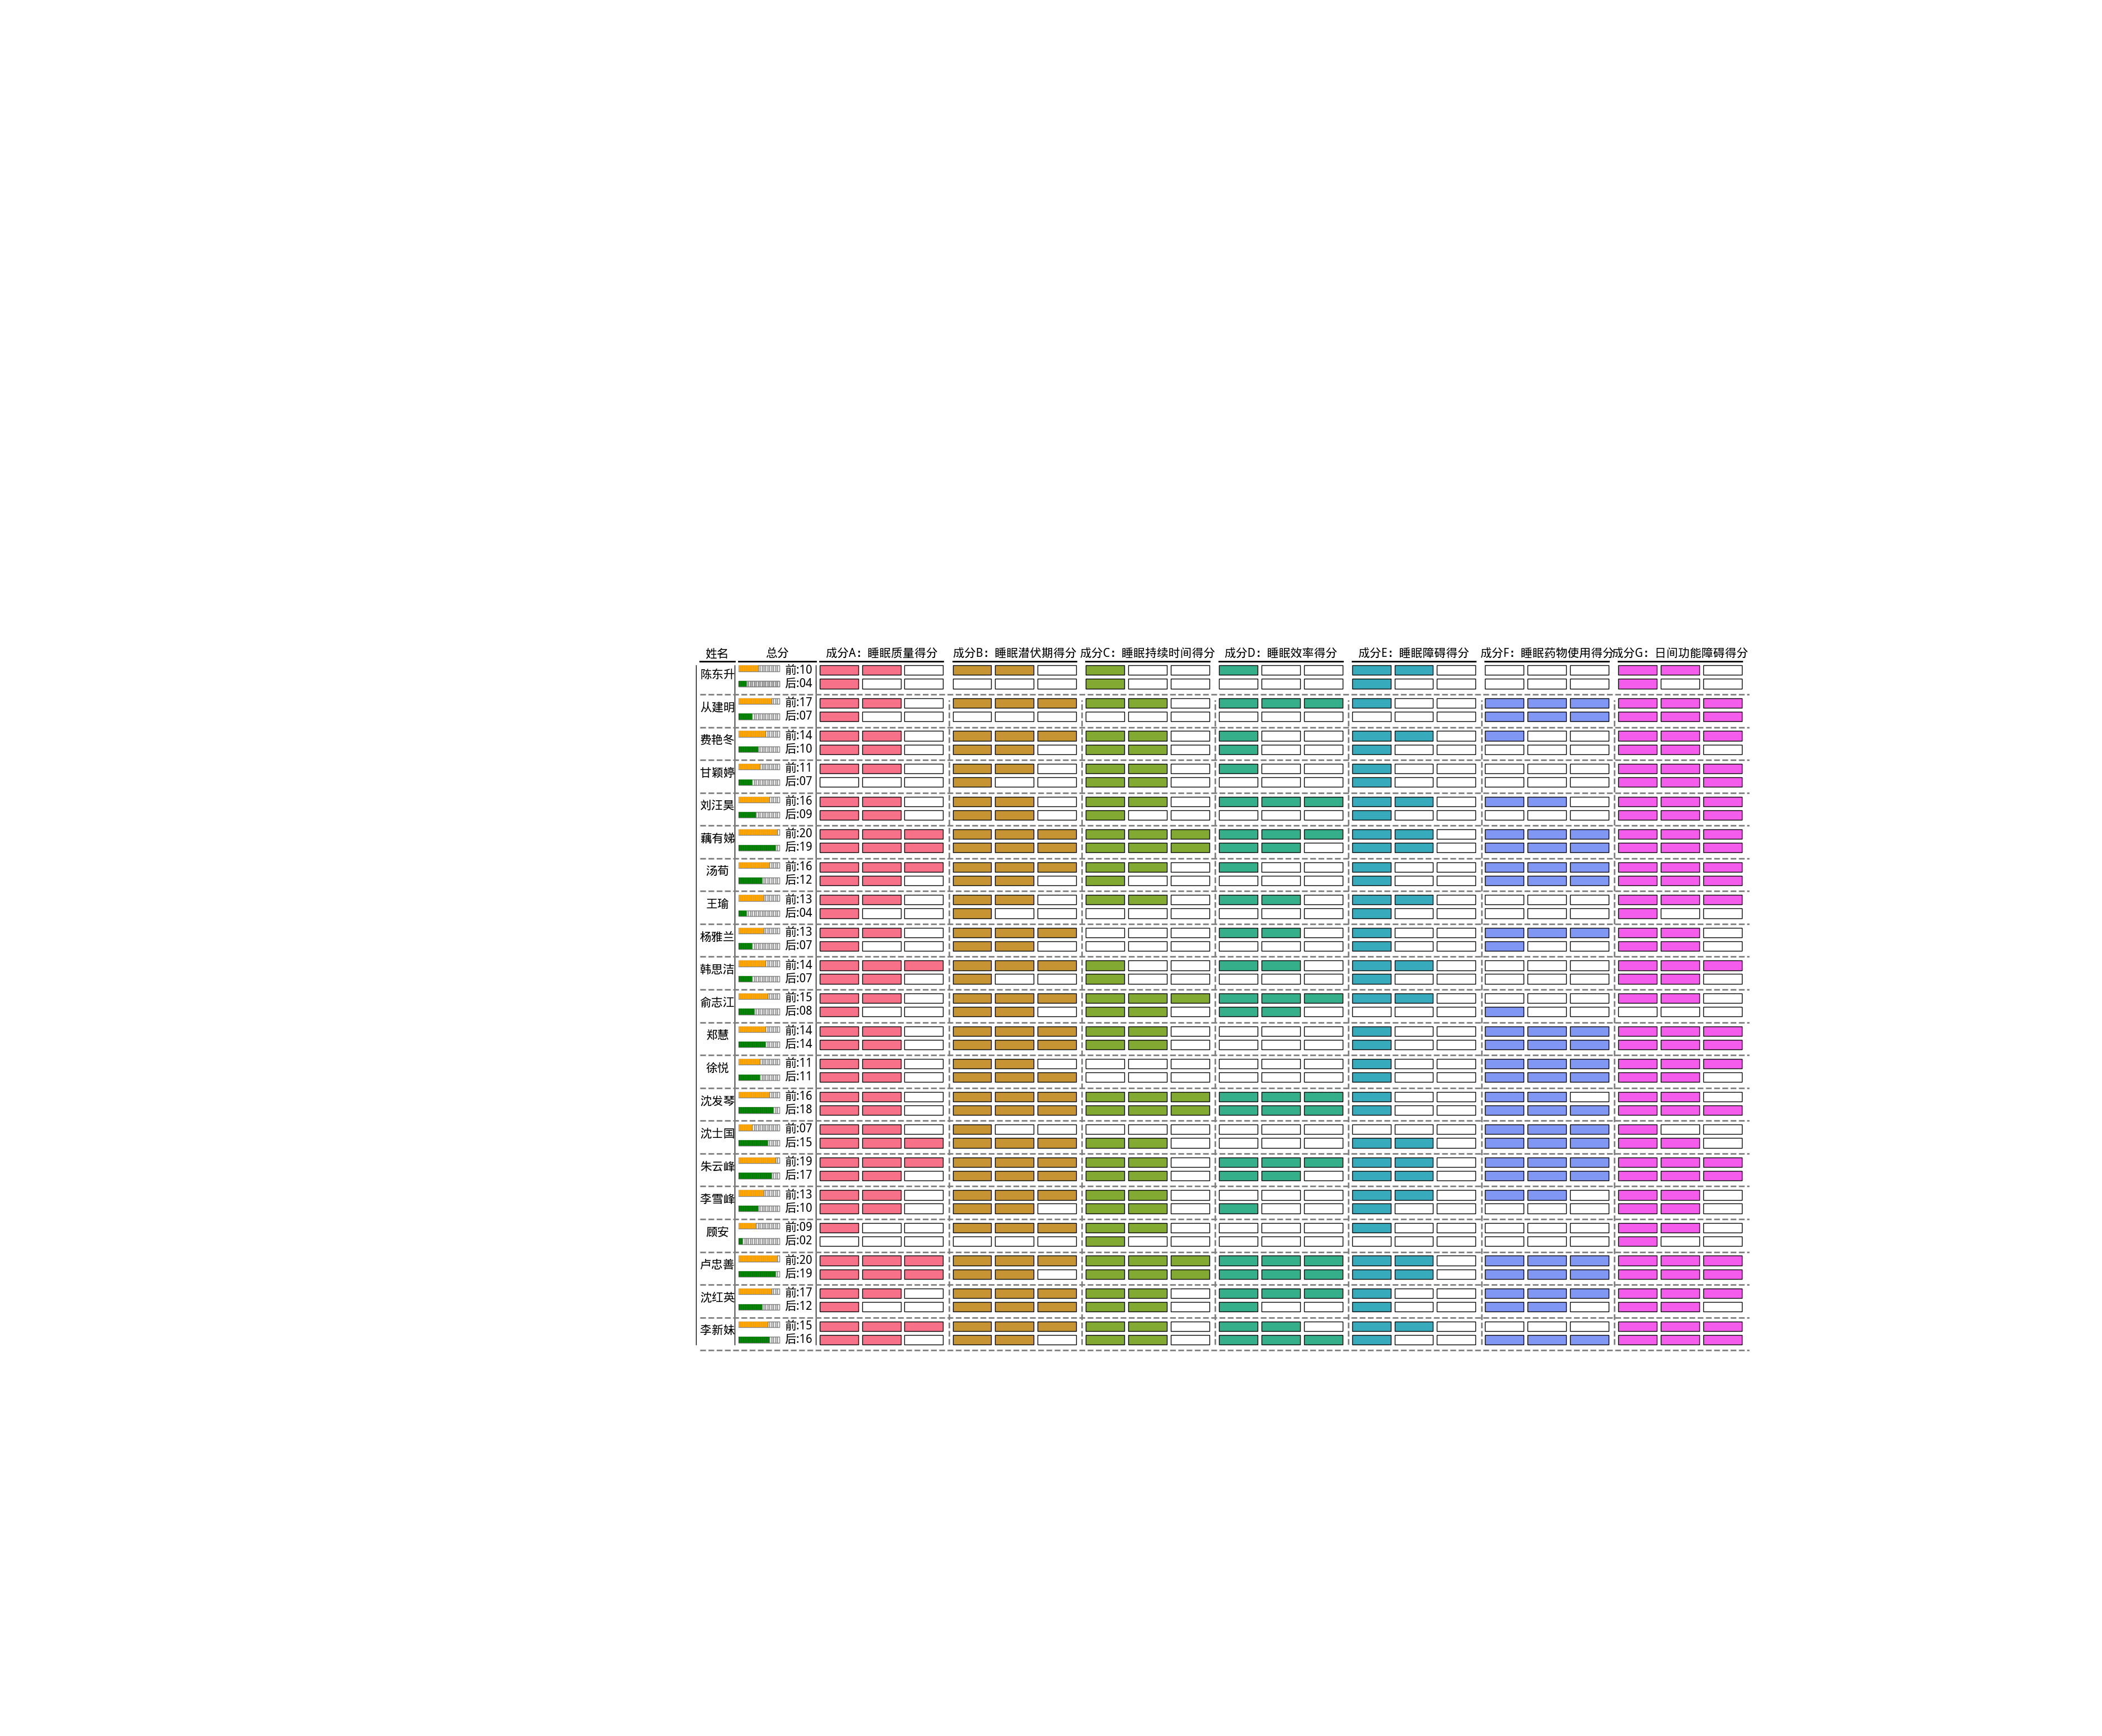

In [98]:
# 设置图形大小
fig, ax = plt.subplots(figsize=(60, 40))  

ppd = 0
for row in range(len(data)):
    p = list(data)[row]
    values = data[p]
    pp = 0
    #每隔三行调整间距
    if row>=2 and (row)%2==0:
        ppd += 0.3

    for col in range(21):
            
            # 计算矩形的位置
            x = col * (rect_width + spacing) #[0-1] [2-3] [4] 
            y = row * (rect_height + spacing)+ppd
            
            # 每隔三列调整间距
            if col>=3 and (col)%3==0:
                pp += 0.3
            x+=pp

            # 计算当前列的属性索引
            attr_index = col // interval
            
            # 只填充相应数量的矩形
            if col % interval < values[attr_index]:
                color = colors[attr_index]
            else:
                color = 'white'  # 未填充颜色

            # 创建矩形对象
            rect = patches.Rectangle((x, y), rect_width, rect_height, edgecolor='black', facecolor=color)
            
            # 添加矩形到绘图区域
            ax.add_patch(rect)

for i in range(1, len(labels)):
    x = i * interval * (rect_width + spacing) - spacing / 2
# 添加上方横线
line_y = len(data) * (rect_height + spacing) + 4.2+1.8  # 横线的位置在矩形上方

ppt = 0

for i, start_col in enumerate(range(0, 21, interval)):
    end_col = min(start_col + interval, 21)
    x_start = start_col * (rect_width + spacing)
    x_end = end_col * (rect_width + spacing) - spacing
    
    # 确定并调整标签横线起始位置 
    if i>0:
        ppt += 0.3
    x_start+=ppt
    x_end+=ppt
    ax.plot([x_start, x_end], [line_y, line_y], color='black', linewidth=2)
    
    # 在每条切割线的中间位置添加不同的文本
    if i < len(labels):
        mid_x = (x_start + x_end) / 2
        ax.text(mid_x, line_y+0.1 , labels[i], ha='center', va='bottom', fontsize=15, fontweight='bold', fontproperties=font_prop)
        if i !=0:
            ax.plot([mid_x-1.9-1.5, mid_x-1.9-1.5], [0, len(data) * (rect_height + spacing)+4], color='gray', linestyle='--', linewidth=2)

line_x = -spacing 

# 绘制总分标题文字和水平线
ax.plot([line_x, line_x-4], [line_y, line_y], color='black', linewidth=2)
mid_x = ( line_x+ line_x-4) / 2
ax.text(mid_x, line_y + 0.1, "总分", ha='center', va='bottom', fontsize=15, fontweight='bold', fontproperties=font_prop)

# 绘制姓名标题文字和水平线
ax.plot([line_x-6, line_x-4.2], [line_y, line_y], color='black', linewidth=2)
mid_x = ( line_x-6+ line_x-4.2) / 2
ax.text(mid_x, line_y + 0.1, "姓名", ha='center', va='bottom', fontsize=15, fontweight='bold', fontproperties=font_prop)

# 绘制竖直线
ax.plot([line_x, line_x], [0, 35.2], color='black', linewidth=1)
ax.plot([line_x-4.2, line_x-4.2], [0, 35.2], color='black', linewidth=1)
ax.plot([line_x-6.2, line_x-6.2], [0, 35.2], color='black', linewidth=1)


for iii in range(int(len(data)/2)):
    # 计算名字绘制位置
    mid_y = (0 + (2+iii*4) * (rect_height + spacing)) / 2
    d = list(data)[iii*2][:-3]     
    p1 = list(data)[iii*2]
    pp1 = data[p1]
    p2 = list(data)[iii*2+1]
    pp2 = data[p2]
    x = line_x - 2
    y = 2 * iii * (rect_height + spacing) + rect_height / 2
    total_width = 2.1
    height = 0.5
    ax.text(line_x - 5.1, mid_y+iii*0.3, f'{d}', ha='center', va='center', fontsize=15, fontweight='bold', fontproperties=font_prop)
    ax.text(line_x - 0.9, 2*iii * (rect_height + spacing) + rect_height / 2 +iii*0.3, f'后:{sum(pp1):02}', ha='center', va='center', fontsize=15, fontweight='bold', fontproperties=font_prop)
    ax.text(line_x - 0.9, 2 *iii* (rect_height + spacing) +rect_height + (rect_height / 2)+iii*0.3+0.2, f'前:{sum(pp2):02}', ha='center', va='center', fontsize=15, fontweight='bold', fontproperties=font_prop)
    
    ax.plot([-spacing - 6, 21 * (rect_width + spacing)+2 ], [mid_y+iii*0.3-1.0, mid_y+iii*0.3-1.0], color='gray',  linestyle='--',linewidth=2)
    
    filled_squares = sum(pp2) 
    square_size = 0.1
    total_height = 0.1 
    for i in range(21):  # 绘制21个小格子
            rect = patches.Rectangle((x-2 + i * square_size, 2 *iii* (rect_height + spacing) +rect_height + (rect_height / 2)+iii*0.3+0.15), square_size, 0.3, linewidth=1, edgecolor='gray', facecolor='none')
            ax.add_patch(rect)
            
            # 填充前18个小格子
            if i < filled_squares:
                filled_rect = patches.Rectangle((x + i * square_size-2, 2 *iii* (rect_height + spacing) +rect_height + (rect_height / 2)+iii*0.3+0.15), square_size, 0.3, 
                                                linewidth=0, edgecolor='gray', facecolor='orange')
                ax.add_patch(filled_rect)



    filled_squares = sum(pp1) 
    square_size = 0.1
    total_height = 0.1 
    # 绘制21个小格子
    for i in range(21):  
            rect1 = patches.Rectangle((x-2 + i * square_size, y - height / 2+iii*0.3+0.1), square_size, 0.3, 
                                    linewidth=1, edgecolor='gray', facecolor='none')
            ax.add_patch(rect1)
            
            # 填充前18个小格子
            if i < filled_squares:
                filled_rect1 = patches.Rectangle((x + i * square_size-2, y - height / 2+iii*0.3+0.1), square_size, 0.3, 
                                                linewidth=0, edgecolor='gray', facecolor='g')
                ax.add_patch(filled_rect1)

filled_squares = sum(pp1) 
square_size = 0.1
total_height = 0.1
# 绘制21个小格子 
for i in range(21):  
        rect1 = patches.Rectangle((x-2 + i * square_size, y - height / 2+iii*0.3+0.1), square_size, 0.3, 
                                linewidth=1, edgecolor='gray', facecolor='none')
        ax.add_patch(rect1)
        
        # 填充前18个小格子
        if i < filled_squares:
            filled_rect1 = patches.Rectangle((x + i * square_size-2, y - height / 2+iii*0.3+0.1), square_size, 0.3, 
                                            linewidth=0, edgecolor='gray', facecolor='g')
            ax.add_patch(filled_rect1)



# 设置坐标轴限制
ax.set_xlim(-spacing - len(data), 21 * (rect_width + spacing) + 20)  # 增加左侧和右侧空间
ax.set_ylim(0 - 20, len(data) * (rect_height + spacing) + 40) 
ax.set_aspect('equal')

# 去掉坐标轴
ax.axis('off')
plt.savefig("../result/psqi总分及各成份得分.svg")
plt.show() 